In [1]:
import torch
from tqdm import tqdm
from data import train_loader, val_loader
import matplotlib.pyplot as plt
import numpy as np

torch.Size([8, 28, 28])
torch.Size([8])


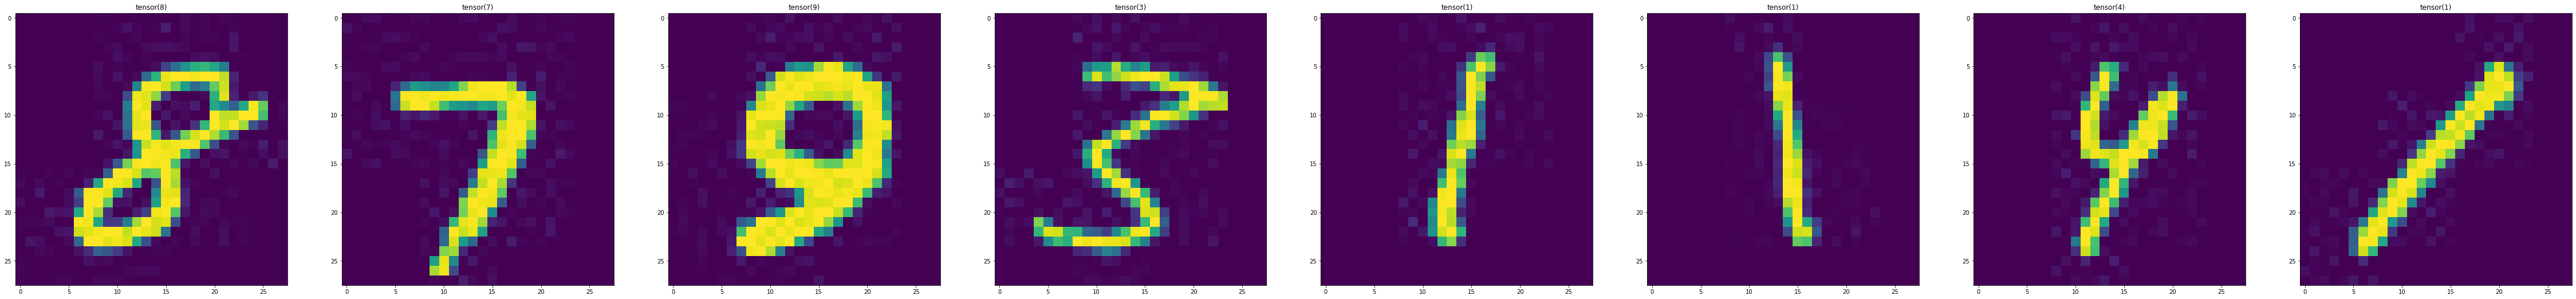

In [2]:
plt.figure(figsize=(80,10))
for x,y in train_loader:
    print(x.shape)
    print(y.shape)
    for i in range(8):
        plt.subplot(180+i+1)
        plt.imshow(x[i])
        plt.title(y[i].data)
    break

In [9]:
model_params = {

    "loss": "cross_entropy",
    "layer_config": [500, 250, 100],
    "activation": "relu",
    "output": "softmax",
    "input_layer_size" : 28*28,
    "output_layer_size" : 10
}

optimizer_params = {

    "optimizer": "sgd",
    "learning_rate": 1e-3,
    "momentum": 0.9,
    "beta": 0.9,
    "epsilon": 	1e-8,
    "weight_decay": 1e-4

  }

net = model(model_params)
net.to('cuda')
opt = optimizer(optimizer_params)

In [10]:
epochs = 15
k = 10
batch_size = 8
device = 'cuda'

for epoch in range(epochs):

    train_loss = 0

    for X,y in tqdm(train_loader) : 

        X = x.to(device)
        y = y.to(device)

        fw = net.forward(X)
        train_loss += functions[model_params["loss"]](y, fw['y_hat'].T, batch_size)
        print(train_loss)

        bw = net.backprop(y, fw)
        opt.optimize(net, bw)

    val_acc = 0
    val_loss = 0

    for X,y in tqdm(val_loader) : 

        X = x.to(device)
        y = y.to(device)

        fw = net.forward(X)
        y_pred = torch.argmax(fw['y_hat'], dim = 0)

        val_loss += functions[model_params["loss"]](y, fw['y_hat'].T, batch_size)
        val_acc += (y_pred == y).sum()

    print("Epoch : {}, Train Loss {}, Val Loss {}, Val Accuracy {}".format(epoch, train_loss/len(data_loader), val_loss/len(data_loader), val_acc/len(data_loader)))

  0%|          | 7/5115 [00:00<01:18, 64.68it/s]

tensor(4.7951, device='cuda:0', dtype=torch.float64)
tensor(9.3932, device='cuda:0', dtype=torch.float64)
tensor(13.5696, device='cuda:0', dtype=torch.float64)
tensor(18.0461, device='cuda:0', dtype=torch.float64)
tensor(22.3807, device='cuda:0', dtype=torch.float64)
tensor(26.6764, device='cuda:0', dtype=torch.float64)
tensor(31.1128, device='cuda:0', dtype=torch.float64)
tensor(35.8366, device='cuda:0', dtype=torch.float64)
tensor(40.1581, device='cuda:0', dtype=torch.float64)
tensor(44.5250, device='cuda:0', dtype=torch.float64)
tensor(48.9814, device='cuda:0', dtype=torch.float64)
tensor(53.4551, device='cuda:0', dtype=torch.float64)
tensor(57.9509, device='cuda:0', dtype=torch.float64)


  0%|          | 21/5115 [00:00<01:15, 67.41it/s]

tensor(62.5867, device='cuda:0', dtype=torch.float64)
tensor(67.4004, device='cuda:0', dtype=torch.float64)
tensor(72.0512, device='cuda:0', dtype=torch.float64)
tensor(76.5175, device='cuda:0', dtype=torch.float64)
tensor(81.0066, device='cuda:0', dtype=torch.float64)
tensor(85.4662, device='cuda:0', dtype=torch.float64)
tensor(89.9620, device='cuda:0', dtype=torch.float64)
tensor(94.1138, device='cuda:0', dtype=torch.float64)
tensor(98.8982, device='cuda:0', dtype=torch.float64)
tensor(103.4907, device='cuda:0', dtype=torch.float64)
tensor(107.8198, device='cuda:0', dtype=torch.float64)
tensor(112.1003, device='cuda:0', dtype=torch.float64)
tensor(116.3899, device='cuda:0', dtype=torch.float64)
tensor(121.1176, device='cuda:0', dtype=torch.float64)


  1%|          | 36/5115 [00:00<01:17, 65.54it/s]

tensor(125.5363, device='cuda:0', dtype=torch.float64)
tensor(129.9948, device='cuda:0', dtype=torch.float64)
tensor(134.7966, device='cuda:0', dtype=torch.float64)
tensor(139.5939, device='cuda:0', dtype=torch.float64)
tensor(144.2296, device='cuda:0', dtype=torch.float64)
tensor(148.9719, device='cuda:0', dtype=torch.float64)
tensor(153.6305, device='cuda:0', dtype=torch.float64)
tensor(158.1953, device='cuda:0', dtype=torch.float64)
tensor(162.6845, device='cuda:0', dtype=torch.float64)
tensor(167.3474, device='cuda:0', dtype=torch.float64)
tensor(172.0684, device='cuda:0', dtype=torch.float64)
tensor(176.6383, device='cuda:0', dtype=torch.float64)


  1%|          | 43/5115 [00:00<01:28, 57.12it/s]

tensor(181.1567, device='cuda:0', dtype=torch.float64)
tensor(185.8384, device='cuda:0', dtype=torch.float64)
tensor(190.1496, device='cuda:0', dtype=torch.float64)
tensor(194.7076, device='cuda:0', dtype=torch.float64)
tensor(199.1714, device='cuda:0', dtype=torch.float64)
tensor(203.5585, device='cuda:0', dtype=torch.float64)
tensor(207.9894, device='cuda:0', dtype=torch.float64)
tensor(212.5379, device='cuda:0', dtype=torch.float64)
tensor(217.0246, device='cuda:0', dtype=torch.float64)
tensor(221.7700, device='cuda:0', dtype=torch.float64)


  1%|          | 56/5115 [00:00<01:29, 56.53it/s]

tensor(226.3181, device='cuda:0', dtype=torch.float64)
tensor(231.0456, device='cuda:0', dtype=torch.float64)
tensor(235.5380, device='cuda:0', dtype=torch.float64)
tensor(240.3118, device='cuda:0', dtype=torch.float64)
tensor(244.6814, device='cuda:0', dtype=torch.float64)
tensor(249.3038, device='cuda:0', dtype=torch.float64)
tensor(253.6250, device='cuda:0', dtype=torch.float64)
tensor(258.4027, device='cuda:0', dtype=torch.float64)
tensor(262.9236, device='cuda:0', dtype=torch.float64)
tensor(267.4366, device='cuda:0', dtype=torch.float64)
tensor(271.8831, device='cuda:0', dtype=torch.float64)
tensor(276.2887, device='cuda:0', dtype=torch.float64)


  1%|▏         | 69/5115 [00:01<01:29, 56.28it/s]

tensor(280.5891, device='cuda:0', dtype=torch.float64)
tensor(285.0485, device='cuda:0', dtype=torch.float64)
tensor(289.7302, device='cuda:0', dtype=torch.float64)
tensor(294.4218, device='cuda:0', dtype=torch.float64)
tensor(299.0932, device='cuda:0', dtype=torch.float64)
tensor(303.8793, device='cuda:0', dtype=torch.float64)
tensor(308.0425, device='cuda:0', dtype=torch.float64)
tensor(312.5632, device='cuda:0', dtype=torch.float64)
tensor(316.9729, device='cuda:0', dtype=torch.float64)
tensor(321.4749, device='cuda:0', dtype=torch.float64)
tensor(325.9224, device='cuda:0', dtype=torch.float64)
tensor(330.4975, device='cuda:0', dtype=torch.float64)


  2%|▏         | 82/5115 [00:01<01:26, 57.96it/s]

tensor(334.9691, device='cuda:0', dtype=torch.float64)
tensor(339.3279, device='cuda:0', dtype=torch.float64)
tensor(344.0456, device='cuda:0', dtype=torch.float64)
tensor(348.3614, device='cuda:0', dtype=torch.float64)
tensor(352.9178, device='cuda:0', dtype=torch.float64)
tensor(357.2749, device='cuda:0', dtype=torch.float64)
tensor(361.6258, device='cuda:0', dtype=torch.float64)
tensor(366.1759, device='cuda:0', dtype=torch.float64)
tensor(370.6695, device='cuda:0', dtype=torch.float64)
tensor(374.9655, device='cuda:0', dtype=torch.float64)
tensor(379.4514, device='cuda:0', dtype=torch.float64)
tensor(383.9013, device='cuda:0', dtype=torch.float64)
tensor(388.1935, device='cuda:0', dtype=torch.float64)
tensor(392.9857, device='cuda:0', dtype=torch.float64)
tensor(397.0864, device='cuda:0', dtype=torch.float64)


  2%|▏         | 97/5115 [00:01<01:17, 64.41it/s]

tensor(401.7132, device='cuda:0', dtype=torch.float64)
tensor(406.4597, device='cuda:0', dtype=torch.float64)
tensor(410.9351, device='cuda:0', dtype=torch.float64)
tensor(415.5899, device='cuda:0', dtype=torch.float64)
tensor(420.1430, device='cuda:0', dtype=torch.float64)
tensor(424.7070, device='cuda:0', dtype=torch.float64)
tensor(429.0025, device='cuda:0', dtype=torch.float64)
tensor(433.6841, device='cuda:0', dtype=torch.float64)
tensor(438.0577, device='cuda:0', dtype=torch.float64)
tensor(442.5462, device='cuda:0', dtype=torch.float64)
tensor(447.2259, device='cuda:0', dtype=torch.float64)
tensor(451.8057, device='cuda:0', dtype=torch.float64)
tensor(456.2788, device='cuda:0', dtype=torch.float64)
tensor(460.9420, device='cuda:0', dtype=torch.float64)
tensor(465.7579, device='cuda:0', dtype=torch.float64)


  2%|▏         | 112/5115 [00:01<01:14, 67.20it/s]

tensor(470.4597, device='cuda:0', dtype=torch.float64)
tensor(475.1796, device='cuda:0', dtype=torch.float64)
tensor(479.6044, device='cuda:0', dtype=torch.float64)
tensor(483.9151, device='cuda:0', dtype=torch.float64)
tensor(488.4360, device='cuda:0', dtype=torch.float64)
tensor(492.8531, device='cuda:0', dtype=torch.float64)
tensor(497.3608, device='cuda:0', dtype=torch.float64)
tensor(501.9353, device='cuda:0', dtype=torch.float64)
tensor(506.7498, device='cuda:0', dtype=torch.float64)
tensor(511.3398, device='cuda:0', dtype=torch.float64)
tensor(515.9060, device='cuda:0', dtype=torch.float64)
tensor(520.5964, device='cuda:0', dtype=torch.float64)
tensor(525.3575, device='cuda:0', dtype=torch.float64)
tensor(530.1598, device='cuda:0', dtype=torch.float64)
tensor(534.5007, device='cuda:0', dtype=torch.float64)
tensor(539.1987, device='cuda:0', dtype=torch.float64)
tensor(543.9740, device='cuda:0', dtype=torch.float64)


  3%|▎         | 136/5115 [00:02<01:08, 72.30it/s]

tensor(548.7352, device='cuda:0', dtype=torch.float64)
tensor(553.0954, device='cuda:0', dtype=torch.float64)
tensor(557.7839, device='cuda:0', dtype=torch.float64)
tensor(562.3162, device='cuda:0', dtype=torch.float64)
tensor(566.8543, device='cuda:0', dtype=torch.float64)
tensor(571.5523, device='cuda:0', dtype=torch.float64)
tensor(576.0488, device='cuda:0', dtype=torch.float64)
tensor(580.4419, device='cuda:0', dtype=torch.float64)
tensor(585.0842, device='cuda:0', dtype=torch.float64)
tensor(589.6325, device='cuda:0', dtype=torch.float64)
tensor(594.0722, device='cuda:0', dtype=torch.float64)
tensor(598.7394, device='cuda:0', dtype=torch.float64)
tensor(603.1397, device='cuda:0', dtype=torch.float64)
tensor(607.6631, device='cuda:0', dtype=torch.float64)
tensor(611.8649, device='cuda:0', dtype=torch.float64)
tensor(616.5519, device='cuda:0', dtype=torch.float64)


  3%|▎         | 144/5115 [00:02<01:08, 72.26it/s]

tensor(621.0626, device='cuda:0', dtype=torch.float64)
tensor(625.4328, device='cuda:0', dtype=torch.float64)
tensor(629.9330, device='cuda:0', dtype=torch.float64)
tensor(634.0085, device='cuda:0', dtype=torch.float64)
tensor(638.4459, device='cuda:0', dtype=torch.float64)
tensor(642.9101, device='cuda:0', dtype=torch.float64)
tensor(647.5173, device='cuda:0', dtype=torch.float64)
tensor(652.0053, device='cuda:0', dtype=torch.float64)
tensor(656.6766, device='cuda:0', dtype=torch.float64)
tensor(661.3464, device='cuda:0', dtype=torch.float64)
tensor(665.7535, device='cuda:0', dtype=torch.float64)
tensor(670.1059, device='cuda:0', dtype=torch.float64)
tensor(674.4322, device='cuda:0', dtype=torch.float64)
tensor(679.0743, device='cuda:0', dtype=torch.float64)
tensor(683.4598, device='cuda:0', dtype=torch.float64)
tensor(687.9068, device='cuda:0', dtype=torch.float64)


  3%|▎         | 160/5115 [00:02<01:08, 72.28it/s]

tensor(692.3415, device='cuda:0', dtype=torch.float64)
tensor(697.0561, device='cuda:0', dtype=torch.float64)
tensor(701.6688, device='cuda:0', dtype=torch.float64)
tensor(706.1123, device='cuda:0', dtype=torch.float64)
tensor(711.1006, device='cuda:0', dtype=torch.float64)
tensor(715.6129, device='cuda:0', dtype=torch.float64)
tensor(720.1683, device='cuda:0', dtype=torch.float64)
tensor(724.6644, device='cuda:0', dtype=torch.float64)
tensor(729.0971, device='cuda:0', dtype=torch.float64)
tensor(733.4459, device='cuda:0', dtype=torch.float64)
tensor(738.1280, device='cuda:0', dtype=torch.float64)
tensor(742.5818, device='cuda:0', dtype=torch.float64)
tensor(747.3843, device='cuda:0', dtype=torch.float64)
tensor(752.0880, device='cuda:0', dtype=torch.float64)
tensor(756.2490, device='cuda:0', dtype=torch.float64)


  3%|▎         | 176/5115 [00:02<01:15, 65.59it/s]

tensor(760.7466, device='cuda:0', dtype=torch.float64)
tensor(765.2597, device='cuda:0', dtype=torch.float64)
tensor(769.6568, device='cuda:0', dtype=torch.float64)
tensor(774.2465, device='cuda:0', dtype=torch.float64)
tensor(779.0104, device='cuda:0', dtype=torch.float64)
tensor(783.9313, device='cuda:0', dtype=torch.float64)
tensor(788.6178, device='cuda:0', dtype=torch.float64)
tensor(793.2995, device='cuda:0', dtype=torch.float64)
tensor(798.0917, device='cuda:0', dtype=torch.float64)
tensor(802.4300, device='cuda:0', dtype=torch.float64)
tensor(806.9717, device='cuda:0', dtype=torch.float64)
tensor(811.3582, device='cuda:0', dtype=torch.float64)
tensor(815.8889, device='cuda:0', dtype=torch.float64)
tensor(820.0366, device='cuda:0', dtype=torch.float64)


  4%|▎         | 191/5115 [00:02<01:12, 67.84it/s]

tensor(824.5063, device='cuda:0', dtype=torch.float64)
tensor(828.8167, device='cuda:0', dtype=torch.float64)
tensor(833.1924, device='cuda:0', dtype=torch.float64)
tensor(837.5470, device='cuda:0', dtype=torch.float64)
tensor(841.9133, device='cuda:0', dtype=torch.float64)
tensor(846.4480, device='cuda:0', dtype=torch.float64)
tensor(850.9611, device='cuda:0', dtype=torch.float64)
tensor(855.3794, device='cuda:0', dtype=torch.float64)
tensor(859.9655, device='cuda:0', dtype=torch.float64)
tensor(864.4961, device='cuda:0', dtype=torch.float64)
tensor(868.9572, device='cuda:0', dtype=torch.float64)
tensor(873.5145, device='cuda:0', dtype=torch.float64)
tensor(878.0853, device='cuda:0', dtype=torch.float64)
tensor(882.5380, device='cuda:0', dtype=torch.float64)


  4%|▍         | 207/5115 [00:03<01:09, 70.14it/s]

tensor(887.3768, device='cuda:0', dtype=torch.float64)
tensor(892.2331, device='cuda:0', dtype=torch.float64)
tensor(897.1088, device='cuda:0', dtype=torch.float64)
tensor(901.5430, device='cuda:0', dtype=torch.float64)
tensor(906.1950, device='cuda:0', dtype=torch.float64)
tensor(910.7197, device='cuda:0', dtype=torch.float64)
tensor(914.9978, device='cuda:0', dtype=torch.float64)
tensor(919.4954, device='cuda:0', dtype=torch.float64)
tensor(923.9699, device='cuda:0', dtype=torch.float64)
tensor(928.6991, device='cuda:0', dtype=torch.float64)
tensor(932.9738, device='cuda:0', dtype=torch.float64)
tensor(937.7036, device='cuda:0', dtype=torch.float64)
tensor(942.1863, device='cuda:0', dtype=torch.float64)
tensor(946.3154, device='cuda:0', dtype=torch.float64)
tensor(950.7442, device='cuda:0', dtype=torch.float64)
tensor(955.4093, device='cuda:0', dtype=torch.float64)


  4%|▍         | 223/5115 [00:03<01:09, 70.80it/s]

tensor(960.0799, device='cuda:0', dtype=torch.float64)
tensor(964.2919, device='cuda:0', dtype=torch.float64)
tensor(968.9135, device='cuda:0', dtype=torch.float64)
tensor(973.1976, device='cuda:0', dtype=torch.float64)
tensor(977.6966, device='cuda:0', dtype=torch.float64)
tensor(982.2502, device='cuda:0', dtype=torch.float64)
tensor(986.5750, device='cuda:0', dtype=torch.float64)
tensor(990.9538, device='cuda:0', dtype=torch.float64)
tensor(995.2449, device='cuda:0', dtype=torch.float64)
tensor(999.7925, device='cuda:0', dtype=torch.float64)
tensor(1004.3772, device='cuda:0', dtype=torch.float64)
tensor(1008.7933, device='cuda:0', dtype=torch.float64)
tensor(1013.4550, device='cuda:0', dtype=torch.float64)
tensor(1017.7036, device='cuda:0', dtype=torch.float64)
tensor(1022.2044, device='cuda:0', dtype=torch.float64)
tensor(1026.9729, device='cuda:0', dtype=torch.float64)


  5%|▍         | 238/5115 [00:03<01:10, 69.09it/s]

tensor(1031.6382, device='cuda:0', dtype=torch.float64)
tensor(1036.2386, device='cuda:0', dtype=torch.float64)
tensor(1040.8492, device='cuda:0', dtype=torch.float64)
tensor(1045.4107, device='cuda:0', dtype=torch.float64)
tensor(1050.2322, device='cuda:0', dtype=torch.float64)
tensor(1054.5629, device='cuda:0', dtype=torch.float64)
tensor(1058.8791, device='cuda:0', dtype=torch.float64)
tensor(1063.3752, device='cuda:0', dtype=torch.float64)
tensor(1067.9530, device='cuda:0', dtype=torch.float64)
tensor(1072.5084, device='cuda:0', dtype=torch.float64)
tensor(1077.0943, device='cuda:0', dtype=torch.float64)
tensor(1081.6494, device='cuda:0', dtype=torch.float64)
tensor(1086.2768, device='cuda:0', dtype=torch.float64)
tensor(1090.7221, device='cuda:0', dtype=torch.float64)


  5%|▍         | 252/5115 [00:03<01:11, 67.96it/s]

tensor(1094.9551, device='cuda:0', dtype=torch.float64)
tensor(1099.7446, device='cuda:0', dtype=torch.float64)
tensor(1104.4943, device='cuda:0', dtype=torch.float64)
tensor(1109.1633, device='cuda:0', dtype=torch.float64)
tensor(1113.8202, device='cuda:0', dtype=torch.float64)
tensor(1118.6232, device='cuda:0', dtype=torch.float64)
tensor(1122.9227, device='cuda:0', dtype=torch.float64)
tensor(1127.3357, device='cuda:0', dtype=torch.float64)
tensor(1131.7881, device='cuda:0', dtype=torch.float64)
tensor(1136.4491, device='cuda:0', dtype=torch.float64)
tensor(1140.9107, device='cuda:0', dtype=torch.float64)
tensor(1145.5503, device='cuda:0', dtype=torch.float64)
tensor(1149.9747, device='cuda:0', dtype=torch.float64)
tensor(1154.6622, device='cuda:0', dtype=torch.float64)


  5%|▌         | 267/5115 [00:04<01:09, 69.30it/s]

tensor(1159.3793, device='cuda:0', dtype=torch.float64)
tensor(1164.0832, device='cuda:0', dtype=torch.float64)
tensor(1168.7025, device='cuda:0', dtype=torch.float64)
tensor(1173.2410, device='cuda:0', dtype=torch.float64)
tensor(1177.7814, device='cuda:0', dtype=torch.float64)
tensor(1182.4044, device='cuda:0', dtype=torch.float64)
tensor(1187.0174, device='cuda:0', dtype=torch.float64)
tensor(1191.6098, device='cuda:0', dtype=torch.float64)
tensor(1196.2030, device='cuda:0', dtype=torch.float64)
tensor(1200.8121, device='cuda:0', dtype=torch.float64)
tensor(1205.2500, device='cuda:0', dtype=torch.float64)
tensor(1209.8905, device='cuda:0', dtype=torch.float64)
tensor(1214.3781, device='cuda:0', dtype=torch.float64)
tensor(1218.8013, device='cuda:0', dtype=torch.float64)
tensor(1223.0678, device='cuda:0', dtype=torch.float64)


  5%|▌         | 281/5115 [00:04<01:10, 68.35it/s]

tensor(1227.3910, device='cuda:0', dtype=torch.float64)
tensor(1231.8491, device='cuda:0', dtype=torch.float64)
tensor(1236.3288, device='cuda:0', dtype=torch.float64)
tensor(1240.8613, device='cuda:0', dtype=torch.float64)
tensor(1245.2363, device='cuda:0', dtype=torch.float64)
tensor(1249.7694, device='cuda:0', dtype=torch.float64)
tensor(1254.1200, device='cuda:0', dtype=torch.float64)
tensor(1258.4858, device='cuda:0', dtype=torch.float64)
tensor(1263.0922, device='cuda:0', dtype=torch.float64)
tensor(1267.5628, device='cuda:0', dtype=torch.float64)
tensor(1271.8482, device='cuda:0', dtype=torch.float64)
tensor(1276.3773, device='cuda:0', dtype=torch.float64)
tensor(1280.7783, device='cuda:0', dtype=torch.float64)
tensor(1285.0524, device='cuda:0', dtype=torch.float64)


  6%|▌         | 296/5115 [00:04<01:10, 68.40it/s]

tensor(1289.4313, device='cuda:0', dtype=torch.float64)
tensor(1293.8411, device='cuda:0', dtype=torch.float64)
tensor(1298.0587, device='cuda:0', dtype=torch.float64)
tensor(1302.5340, device='cuda:0', dtype=torch.float64)
tensor(1307.0227, device='cuda:0', dtype=torch.float64)
tensor(1311.7780, device='cuda:0', dtype=torch.float64)
tensor(1316.1856, device='cuda:0', dtype=torch.float64)
tensor(1320.6611, device='cuda:0', dtype=torch.float64)
tensor(1324.9061, device='cuda:0', dtype=torch.float64)
tensor(1329.3886, device='cuda:0', dtype=torch.float64)
tensor(1333.9819, device='cuda:0', dtype=torch.float64)
tensor(1338.3654, device='cuda:0', dtype=torch.float64)
tensor(1342.6765, device='cuda:0', dtype=torch.float64)
tensor(1347.3642, device='cuda:0', dtype=torch.float64)


  6%|▌         | 303/5115 [00:04<01:16, 63.14it/s]

tensor(1351.8165, device='cuda:0', dtype=torch.float64)
tensor(1356.5002, device='cuda:0', dtype=torch.float64)
tensor(1361.0636, device='cuda:0', dtype=torch.float64)
tensor(1365.7293, device='cuda:0', dtype=torch.float64)
tensor(1370.2875, device='cuda:0', dtype=torch.float64)
tensor(1374.9205, device='cuda:0', dtype=torch.float64)
tensor(1379.4676, device='cuda:0', dtype=torch.float64)
tensor(1383.7616, device='cuda:0', dtype=torch.float64)
tensor(1388.1465, device='cuda:0', dtype=torch.float64)
tensor(1392.8486, device='cuda:0', dtype=torch.float64)


  6%|▌         | 317/5115 [00:04<01:18, 61.04it/s]

tensor(1397.4789, device='cuda:0', dtype=torch.float64)
tensor(1402.2345, device='cuda:0', dtype=torch.float64)
tensor(1406.6491, device='cuda:0', dtype=torch.float64)
tensor(1411.1046, device='cuda:0', dtype=torch.float64)
tensor(1415.6662, device='cuda:0', dtype=torch.float64)
tensor(1420.1318, device='cuda:0', dtype=torch.float64)
tensor(1424.7391, device='cuda:0', dtype=torch.float64)
tensor(1429.4080, device='cuda:0', dtype=torch.float64)
tensor(1433.9320, device='cuda:0', dtype=torch.float64)
tensor(1438.6458, device='cuda:0', dtype=torch.float64)
tensor(1442.9141, device='cuda:0', dtype=torch.float64)
tensor(1447.6302, device='cuda:0', dtype=torch.float64)
tensor(1452.1837, device='cuda:0', dtype=torch.float64)


  6%|▋         | 331/5115 [00:05<01:21, 58.49it/s]

tensor(1456.8075, device='cuda:0', dtype=torch.float64)
tensor(1461.2459, device='cuda:0', dtype=torch.float64)
tensor(1465.7453, device='cuda:0', dtype=torch.float64)
tensor(1470.5441, device='cuda:0', dtype=torch.float64)
tensor(1475.1700, device='cuda:0', dtype=torch.float64)
tensor(1479.4858, device='cuda:0', dtype=torch.float64)
tensor(1484.0046, device='cuda:0', dtype=torch.float64)
tensor(1488.4547, device='cuda:0', dtype=torch.float64)
tensor(1492.9421, device='cuda:0', dtype=torch.float64)
tensor(1497.0919, device='cuda:0', dtype=torch.float64)
tensor(1501.6608, device='cuda:0', dtype=torch.float64)
tensor(1506.0296, device='cuda:0', dtype=torch.float64)


  7%|▋         | 337/5115 [00:05<01:24, 56.55it/s]

tensor(1510.4232, device='cuda:0', dtype=torch.float64)
tensor(1515.0542, device='cuda:0', dtype=torch.float64)
tensor(1519.8971, device='cuda:0', dtype=torch.float64)
tensor(1524.3454, device='cuda:0', dtype=torch.float64)
tensor(1528.6875, device='cuda:0', dtype=torch.float64)
tensor(1533.0479, device='cuda:0', dtype=torch.float64)
tensor(1537.5706, device='cuda:0', dtype=torch.float64)
tensor(1542.1219, device='cuda:0', dtype=torch.float64)
tensor(1546.5627, device='cuda:0', dtype=torch.float64)
tensor(1550.8496, device='cuda:0', dtype=torch.float64)


  7%|▋         | 349/5115 [00:05<01:26, 54.95it/s]

tensor(1555.3787, device='cuda:0', dtype=torch.float64)
tensor(1559.7892, device='cuda:0', dtype=torch.float64)
tensor(1564.2122, device='cuda:0', dtype=torch.float64)
tensor(1568.7621, device='cuda:0', dtype=torch.float64)
tensor(1573.5092, device='cuda:0', dtype=torch.float64)
tensor(1578.0488, device='cuda:0', dtype=torch.float64)
tensor(1582.6226, device='cuda:0', dtype=torch.float64)
tensor(1586.9421, device='cuda:0', dtype=torch.float64)
tensor(1591.1866, device='cuda:0', dtype=torch.float64)
tensor(1595.4918, device='cuda:0', dtype=torch.float64)
tensor(1600.1246, device='cuda:0', dtype=torch.float64)


  7%|▋         | 362/5115 [00:05<01:22, 57.42it/s]

tensor(1604.6153, device='cuda:0', dtype=torch.float64)
tensor(1609.0813, device='cuda:0', dtype=torch.float64)
tensor(1613.7521, device='cuda:0', dtype=torch.float64)
tensor(1618.4197, device='cuda:0', dtype=torch.float64)
tensor(1622.9077, device='cuda:0', dtype=torch.float64)
tensor(1627.1763, device='cuda:0', dtype=torch.float64)
tensor(1631.5619, device='cuda:0', dtype=torch.float64)
tensor(1635.5314, device='cuda:0', dtype=torch.float64)
tensor(1639.8593, device='cuda:0', dtype=torch.float64)
tensor(1644.3823, device='cuda:0', dtype=torch.float64)
tensor(1649.0059, device='cuda:0', dtype=torch.float64)
tensor(1653.5047, device='cuda:0', dtype=torch.float64)
tensor(1657.9691, device='cuda:0', dtype=torch.float64)


  7%|▋         | 376/5115 [00:05<01:21, 58.48it/s]

tensor(1662.5900, device='cuda:0', dtype=torch.float64)
tensor(1667.3190, device='cuda:0', dtype=torch.float64)
tensor(1672.0104, device='cuda:0', dtype=torch.float64)
tensor(1676.5876, device='cuda:0', dtype=torch.float64)
tensor(1680.9607, device='cuda:0', dtype=torch.float64)
tensor(1685.5269, device='cuda:0', dtype=torch.float64)
tensor(1690.1106, device='cuda:0', dtype=torch.float64)
tensor(1694.6305, device='cuda:0', dtype=torch.float64)
tensor(1699.3345, device='cuda:0', dtype=torch.float64)
tensor(1703.8654, device='cuda:0', dtype=torch.float64)
tensor(1708.5092, device='cuda:0', dtype=torch.float64)
tensor(1713.0378, device='cuda:0', dtype=torch.float64)


  8%|▊         | 390/5115 [00:06<01:16, 61.36it/s]

tensor(1717.8083, device='cuda:0', dtype=torch.float64)
tensor(1722.3792, device='cuda:0', dtype=torch.float64)
tensor(1726.9118, device='cuda:0', dtype=torch.float64)
tensor(1731.2606, device='cuda:0', dtype=torch.float64)
tensor(1735.9005, device='cuda:0', dtype=torch.float64)
tensor(1740.3869, device='cuda:0', dtype=torch.float64)
tensor(1744.6742, device='cuda:0', dtype=torch.float64)
tensor(1748.9422, device='cuda:0', dtype=torch.float64)
tensor(1753.5714, device='cuda:0', dtype=torch.float64)
tensor(1757.9176, device='cuda:0', dtype=torch.float64)
tensor(1762.5379, device='cuda:0', dtype=torch.float64)
tensor(1767.2997, device='cuda:0', dtype=torch.float64)
tensor(1771.7206, device='cuda:0', dtype=torch.float64)


  8%|▊         | 397/5115 [00:06<01:21, 57.61it/s]

tensor(1776.2447, device='cuda:0', dtype=torch.float64)
tensor(1780.7987, device='cuda:0', dtype=torch.float64)
tensor(1785.0475, device='cuda:0', dtype=torch.float64)
tensor(1789.5045, device='cuda:0', dtype=torch.float64)
tensor(1794.2235, device='cuda:0', dtype=torch.float64)
tensor(1798.7029, device='cuda:0', dtype=torch.float64)
tensor(1803.0983, device='cuda:0', dtype=torch.float64)
tensor(1807.5028, device='cuda:0', dtype=torch.float64)
tensor(1811.8937, device='cuda:0', dtype=torch.float64)


  8%|▊         | 409/5115 [00:06<01:21, 57.54it/s]

tensor(1816.5267, device='cuda:0', dtype=torch.float64)
tensor(1820.7617, device='cuda:0', dtype=torch.float64)
tensor(1825.5136, device='cuda:0', dtype=torch.float64)
tensor(1830.1812, device='cuda:0', dtype=torch.float64)
tensor(1834.9688, device='cuda:0', dtype=torch.float64)
tensor(1839.3232, device='cuda:0', dtype=torch.float64)
tensor(1843.5637, device='cuda:0', dtype=torch.float64)
tensor(1848.1021, device='cuda:0', dtype=torch.float64)
tensor(1852.7256, device='cuda:0', dtype=torch.float64)
tensor(1857.4738, device='cuda:0', dtype=torch.float64)
tensor(1862.1586, device='cuda:0', dtype=torch.float64)
tensor(1866.4965, device='cuda:0', dtype=torch.float64)
tensor(1870.8600, device='cuda:0', dtype=torch.float64)


  8%|▊         | 422/5115 [00:06<01:20, 57.98it/s]

tensor(1875.4448, device='cuda:0', dtype=torch.float64)
tensor(1880.0799, device='cuda:0', dtype=torch.float64)
tensor(1884.7211, device='cuda:0', dtype=torch.float64)
tensor(1889.3403, device='cuda:0', dtype=torch.float64)
tensor(1893.9644, device='cuda:0', dtype=torch.float64)
tensor(1898.7557, device='cuda:0', dtype=torch.float64)
tensor(1903.2075, device='cuda:0', dtype=torch.float64)
tensor(1907.7994, device='cuda:0', dtype=torch.float64)
tensor(1912.0841, device='cuda:0', dtype=torch.float64)
tensor(1916.3918, device='cuda:0', dtype=torch.float64)
tensor(1921.1066, device='cuda:0', dtype=torch.float64)
tensor(1925.7715, device='cuda:0', dtype=torch.float64)
tensor(1930.0023, device='cuda:0', dtype=torch.float64)
tensor(1934.7576, device='cuda:0', dtype=torch.float64)


  9%|▊         | 437/5115 [00:06<01:17, 60.31it/s]

tensor(1939.4507, device='cuda:0', dtype=torch.float64)
tensor(1944.2520, device='cuda:0', dtype=torch.float64)
tensor(1948.7942, device='cuda:0', dtype=torch.float64)
tensor(1953.3864, device='cuda:0', dtype=torch.float64)
tensor(1957.9796, device='cuda:0', dtype=torch.float64)
tensor(1962.5056, device='cuda:0', dtype=torch.float64)
tensor(1967.1740, device='cuda:0', dtype=torch.float64)
tensor(1971.7414, device='cuda:0', dtype=torch.float64)
tensor(1976.2405, device='cuda:0', dtype=torch.float64)
tensor(1980.5605, device='cuda:0', dtype=torch.float64)
tensor(1985.2297, device='cuda:0', dtype=torch.float64)
tensor(1989.6976, device='cuda:0', dtype=torch.float64)
tensor(1994.2624, device='cuda:0', dtype=torch.float64)
tensor(1998.9123, device='cuda:0', dtype=torch.float64)


  9%|▉         | 452/5115 [00:07<01:11, 64.84it/s]

tensor(2003.4167, device='cuda:0', dtype=torch.float64)
tensor(2007.7798, device='cuda:0', dtype=torch.float64)
tensor(2012.2703, device='cuda:0', dtype=torch.float64)
tensor(2016.8418, device='cuda:0', dtype=torch.float64)
tensor(2021.1379, device='cuda:0', dtype=torch.float64)
tensor(2026.0524, device='cuda:0', dtype=torch.float64)
tensor(2030.4897, device='cuda:0', dtype=torch.float64)
tensor(2035.1326, device='cuda:0', dtype=torch.float64)
tensor(2039.6229, device='cuda:0', dtype=torch.float64)
tensor(2044.0644, device='cuda:0', dtype=torch.float64)
tensor(2048.5872, device='cuda:0', dtype=torch.float64)
tensor(2053.2889, device='cuda:0', dtype=torch.float64)
tensor(2058.2328, device='cuda:0', dtype=torch.float64)
tensor(2062.7004, device='cuda:0', dtype=torch.float64)


  9%|▉         | 468/5115 [00:07<01:06, 70.15it/s]

tensor(2067.4057, device='cuda:0', dtype=torch.float64)
tensor(2071.9863, device='cuda:0', dtype=torch.float64)
tensor(2076.7622, device='cuda:0', dtype=torch.float64)
tensor(2081.4489, device='cuda:0', dtype=torch.float64)
tensor(2086.0271, device='cuda:0', dtype=torch.float64)
tensor(2090.6936, device='cuda:0', dtype=torch.float64)
tensor(2095.1027, device='cuda:0', dtype=torch.float64)
tensor(2099.5086, device='cuda:0', dtype=torch.float64)
tensor(2104.0766, device='cuda:0', dtype=torch.float64)
tensor(2108.6864, device='cuda:0', dtype=torch.float64)
tensor(2113.2270, device='cuda:0', dtype=torch.float64)
tensor(2117.8359, device='cuda:0', dtype=torch.float64)
tensor(2122.5073, device='cuda:0', dtype=torch.float64)
tensor(2127.0758, device='cuda:0', dtype=torch.float64)
tensor(2131.5444, device='cuda:0', dtype=torch.float64)
tensor(2135.9910, device='cuda:0', dtype=torch.float64)


  9%|▉         | 484/5115 [00:07<01:06, 69.57it/s]

tensor(2140.6356, device='cuda:0', dtype=torch.float64)
tensor(2145.2694, device='cuda:0', dtype=torch.float64)
tensor(2149.8439, device='cuda:0', dtype=torch.float64)
tensor(2154.2368, device='cuda:0', dtype=torch.float64)
tensor(2158.7077, device='cuda:0', dtype=torch.float64)
tensor(2163.1652, device='cuda:0', dtype=torch.float64)
tensor(2167.8276, device='cuda:0', dtype=torch.float64)
tensor(2172.5225, device='cuda:0', dtype=torch.float64)
tensor(2177.2197, device='cuda:0', dtype=torch.float64)
tensor(2181.4880, device='cuda:0', dtype=torch.float64)
tensor(2186.1791, device='cuda:0', dtype=torch.float64)
tensor(2190.6980, device='cuda:0', dtype=torch.float64)
tensor(2194.9717, device='cuda:0', dtype=torch.float64)
tensor(2199.6245, device='cuda:0', dtype=torch.float64)
tensor(2203.8882, device='cuda:0', dtype=torch.float64)
tensor(2207.9995, device='cuda:0', dtype=torch.float64)


 10%|▉         | 498/5115 [00:07<01:06, 69.40it/s]

tensor(2212.6044, device='cuda:0', dtype=torch.float64)
tensor(2217.3489, device='cuda:0', dtype=torch.float64)
tensor(2222.0070, device='cuda:0', dtype=torch.float64)
tensor(2226.7055, device='cuda:0', dtype=torch.float64)
tensor(2231.4222, device='cuda:0', dtype=torch.float64)
tensor(2236.1938, device='cuda:0', dtype=torch.float64)
tensor(2240.6208, device='cuda:0', dtype=torch.float64)
tensor(2245.0150, device='cuda:0', dtype=torch.float64)
tensor(2249.4717, device='cuda:0', dtype=torch.float64)
tensor(2254.0863, device='cuda:0', dtype=torch.float64)
tensor(2258.4728, device='cuda:0', dtype=torch.float64)
tensor(2263.1487, device='cuda:0', dtype=torch.float64)
tensor(2267.4295, device='cuda:0', dtype=torch.float64)
tensor(2272.0818, device='cuda:0', dtype=torch.float64)


 10%|▉         | 506/5115 [00:07<01:06, 69.11it/s]

tensor(2276.6387, device='cuda:0', dtype=torch.float64)
tensor(2281.2979, device='cuda:0', dtype=torch.float64)
tensor(2285.7690, device='cuda:0', dtype=torch.float64)
tensor(2290.3645, device='cuda:0', dtype=torch.float64)
tensor(2294.6549, device='cuda:0', dtype=torch.float64)
tensor(2299.2734, device='cuda:0', dtype=torch.float64)
tensor(2303.8610, device='cuda:0', dtype=torch.float64)
tensor(2308.2966, device='cuda:0', dtype=torch.float64)
tensor(2312.7420, device='cuda:0', dtype=torch.float64)
tensor(2317.4069, device='cuda:0', dtype=torch.float64)
tensor(2322.0792, device='cuda:0', dtype=torch.float64)


 10%|█         | 520/5115 [00:08<01:14, 62.07it/s]

tensor(2326.3183, device='cuda:0', dtype=torch.float64)
tensor(2330.8933, device='cuda:0', dtype=torch.float64)
tensor(2335.2860, device='cuda:0', dtype=torch.float64)
tensor(2339.6848, device='cuda:0', dtype=torch.float64)
tensor(2343.9801, device='cuda:0', dtype=torch.float64)
tensor(2348.3869, device='cuda:0', dtype=torch.float64)
tensor(2352.8338, device='cuda:0', dtype=torch.float64)
tensor(2357.5060, device='cuda:0', dtype=torch.float64)
tensor(2361.9516, device='cuda:0', dtype=torch.float64)
tensor(2366.2001, device='cuda:0', dtype=torch.float64)
tensor(2370.6859, device='cuda:0', dtype=torch.float64)
tensor(2375.2093, device='cuda:0', dtype=torch.float64)
tensor(2379.4626, device='cuda:0', dtype=torch.float64)


 10%|█         | 534/5115 [00:08<01:10, 64.84it/s]

tensor(2384.0701, device='cuda:0', dtype=torch.float64)
tensor(2388.4343, device='cuda:0', dtype=torch.float64)
tensor(2392.6747, device='cuda:0', dtype=torch.float64)
tensor(2396.9877, device='cuda:0', dtype=torch.float64)
tensor(2401.3081, device='cuda:0', dtype=torch.float64)
tensor(2405.6402, device='cuda:0', dtype=torch.float64)
tensor(2410.2923, device='cuda:0', dtype=torch.float64)
tensor(2414.8135, device='cuda:0', dtype=torch.float64)
tensor(2419.3117, device='cuda:0', dtype=torch.float64)
tensor(2423.7844, device='cuda:0', dtype=torch.float64)
tensor(2428.2075, device='cuda:0', dtype=torch.float64)
tensor(2432.8610, device='cuda:0', dtype=torch.float64)
tensor(2437.2802, device='cuda:0', dtype=torch.float64)
tensor(2441.6770, device='cuda:0', dtype=torch.float64)
tensor(2446.0095, device='cuda:0', dtype=torch.float64)
tensor(2450.5939, device='cuda:0', dtype=torch.float64)


 11%|█         | 549/5115 [00:08<01:08, 66.76it/s]

tensor(2455.1102, device='cuda:0', dtype=torch.float64)
tensor(2459.5990, device='cuda:0', dtype=torch.float64)
tensor(2464.0889, device='cuda:0', dtype=torch.float64)
tensor(2468.3765, device='cuda:0', dtype=torch.float64)
tensor(2472.8718, device='cuda:0', dtype=torch.float64)
tensor(2477.7650, device='cuda:0', dtype=torch.float64)
tensor(2482.4654, device='cuda:0', dtype=torch.float64)
tensor(2487.2023, device='cuda:0', dtype=torch.float64)
tensor(2491.7076, device='cuda:0', dtype=torch.float64)
tensor(2495.8387, device='cuda:0', dtype=torch.float64)
tensor(2500.1612, device='cuda:0', dtype=torch.float64)
tensor(2504.7038, device='cuda:0', dtype=torch.float64)
tensor(2509.0961, device='cuda:0', dtype=torch.float64)
tensor(2513.6515, device='cuda:0', dtype=torch.float64)


 11%|█         | 564/5115 [00:08<01:08, 66.86it/s]

tensor(2517.9813, device='cuda:0', dtype=torch.float64)
tensor(2522.4302, device='cuda:0', dtype=torch.float64)
tensor(2526.9009, device='cuda:0', dtype=torch.float64)
tensor(2531.2998, device='cuda:0', dtype=torch.float64)
tensor(2535.9037, device='cuda:0', dtype=torch.float64)
tensor(2540.3120, device='cuda:0', dtype=torch.float64)
tensor(2544.9734, device='cuda:0', dtype=torch.float64)
tensor(2549.5185, device='cuda:0', dtype=torch.float64)
tensor(2554.0347, device='cuda:0', dtype=torch.float64)
tensor(2558.6377, device='cuda:0', dtype=torch.float64)
tensor(2563.3713, device='cuda:0', dtype=torch.float64)
tensor(2567.7863, device='cuda:0', dtype=torch.float64)
tensor(2572.2306, device='cuda:0', dtype=torch.float64)
tensor(2576.3785, device='cuda:0', dtype=torch.float64)


 11%|█▏        | 578/5115 [00:08<01:11, 63.68it/s]

tensor(2580.8463, device='cuda:0', dtype=torch.float64)
tensor(2585.6593, device='cuda:0', dtype=torch.float64)
tensor(2590.1957, device='cuda:0', dtype=torch.float64)
tensor(2594.6963, device='cuda:0', dtype=torch.float64)
tensor(2599.1934, device='cuda:0', dtype=torch.float64)
tensor(2603.5259, device='cuda:0', dtype=torch.float64)
tensor(2608.1119, device='cuda:0', dtype=torch.float64)
tensor(2612.8646, device='cuda:0', dtype=torch.float64)
tensor(2617.4369, device='cuda:0', dtype=torch.float64)
tensor(2622.1898, device='cuda:0', dtype=torch.float64)
tensor(2627.0012, device='cuda:0', dtype=torch.float64)
tensor(2631.5962, device='cuda:0', dtype=torch.float64)
tensor(2636.0788, device='cuda:0', dtype=torch.float64)
tensor(2640.6012, device='cuda:0', dtype=torch.float64)


 12%|█▏        | 593/5115 [00:09<01:08, 65.92it/s]

tensor(2645.2991, device='cuda:0', dtype=torch.float64)
tensor(2649.7067, device='cuda:0', dtype=torch.float64)
tensor(2654.4010, device='cuda:0', dtype=torch.float64)
tensor(2659.2028, device='cuda:0', dtype=torch.float64)
tensor(2663.6248, device='cuda:0', dtype=torch.float64)
tensor(2668.1984, device='cuda:0', dtype=torch.float64)
tensor(2673.0100, device='cuda:0', dtype=torch.float64)
tensor(2677.7330, device='cuda:0', dtype=torch.float64)
tensor(2682.4294, device='cuda:0', dtype=torch.float64)
tensor(2686.9622, device='cuda:0', dtype=torch.float64)
tensor(2691.5426, device='cuda:0', dtype=torch.float64)
tensor(2696.2962, device='cuda:0', dtype=torch.float64)
tensor(2700.9930, device='cuda:0', dtype=torch.float64)
tensor(2705.5762, device='cuda:0', dtype=torch.float64)
tensor(2710.2073, device='cuda:0', dtype=torch.float64)


 12%|█▏        | 607/5115 [00:09<01:09, 65.10it/s]

tensor(2714.7954, device='cuda:0', dtype=torch.float64)
tensor(2719.1291, device='cuda:0', dtype=torch.float64)
tensor(2723.6295, device='cuda:0', dtype=torch.float64)
tensor(2728.0258, device='cuda:0', dtype=torch.float64)
tensor(2732.7260, device='cuda:0', dtype=torch.float64)
tensor(2737.2293, device='cuda:0', dtype=torch.float64)
tensor(2741.5416, device='cuda:0', dtype=torch.float64)
tensor(2745.8991, device='cuda:0', dtype=torch.float64)
tensor(2750.5410, device='cuda:0', dtype=torch.float64)
tensor(2754.9972, device='cuda:0', dtype=torch.float64)
tensor(2759.5556, device='cuda:0', dtype=torch.float64)
tensor(2764.0789, device='cuda:0', dtype=torch.float64)
tensor(2768.6159, device='cuda:0', dtype=torch.float64)
tensor(2773.2926, device='cuda:0', dtype=torch.float64)


 12%|█▏        | 622/5115 [00:09<01:14, 60.00it/s]

tensor(2777.5704, device='cuda:0', dtype=torch.float64)
tensor(2781.6890, device='cuda:0', dtype=torch.float64)
tensor(2786.1352, device='cuda:0', dtype=torch.float64)
tensor(2790.5436, device='cuda:0', dtype=torch.float64)
tensor(2794.9641, device='cuda:0', dtype=torch.float64)
tensor(2799.5645, device='cuda:0', dtype=torch.float64)
tensor(2804.0303, device='cuda:0', dtype=torch.float64)
tensor(2808.4649, device='cuda:0', dtype=torch.float64)
tensor(2812.9044, device='cuda:0', dtype=torch.float64)
tensor(2817.2323, device='cuda:0', dtype=torch.float64)
tensor(2821.8540, device='cuda:0', dtype=torch.float64)


 12%|█▏        | 629/5115 [00:09<01:17, 57.90it/s]

tensor(2825.9920, device='cuda:0', dtype=torch.float64)
tensor(2830.3859, device='cuda:0', dtype=torch.float64)
tensor(2834.8709, device='cuda:0', dtype=torch.float64)
tensor(2839.4139, device='cuda:0', dtype=torch.float64)
tensor(2843.9915, device='cuda:0', dtype=torch.float64)
tensor(2848.3276, device='cuda:0', dtype=torch.float64)
tensor(2852.9891, device='cuda:0', dtype=torch.float64)
tensor(2857.5156, device='cuda:0', dtype=torch.float64)
tensor(2862.2634, device='cuda:0', dtype=torch.float64)
tensor(2866.8300, device='cuda:0', dtype=torch.float64)
tensor(2871.6486, device='cuda:0', dtype=torch.float64)


 13%|█▎        | 641/5115 [00:10<01:21, 54.75it/s]

tensor(2876.2314, device='cuda:0', dtype=torch.float64)
tensor(2880.8439, device='cuda:0', dtype=torch.float64)
tensor(2885.4683, device='cuda:0', dtype=torch.float64)
tensor(2890.0587, device='cuda:0', dtype=torch.float64)
tensor(2894.8999, device='cuda:0', dtype=torch.float64)
tensor(2899.4885, device='cuda:0', dtype=torch.float64)
tensor(2904.0663, device='cuda:0', dtype=torch.float64)
tensor(2908.4365, device='cuda:0', dtype=torch.float64)
tensor(2912.8712, device='cuda:0', dtype=torch.float64)
tensor(2917.6089, device='cuda:0', dtype=torch.float64)
tensor(2922.3296, device='cuda:0', dtype=torch.float64)


 13%|█▎        | 655/5115 [00:10<01:14, 59.50it/s]

tensor(2927.1035, device='cuda:0', dtype=torch.float64)
tensor(2931.6323, device='cuda:0', dtype=torch.float64)
tensor(2935.8138, device='cuda:0', dtype=torch.float64)
tensor(2940.1304, device='cuda:0', dtype=torch.float64)
tensor(2944.4760, device='cuda:0', dtype=torch.float64)
tensor(2948.8985, device='cuda:0', dtype=torch.float64)
tensor(2953.5467, device='cuda:0', dtype=torch.float64)
tensor(2958.0205, device='cuda:0', dtype=torch.float64)
tensor(2962.6078, device='cuda:0', dtype=torch.float64)
tensor(2967.3763, device='cuda:0', dtype=torch.float64)
tensor(2971.7180, device='cuda:0', dtype=torch.float64)
tensor(2976.6353, device='cuda:0', dtype=torch.float64)
tensor(2981.4304, device='cuda:0', dtype=torch.float64)
tensor(2985.9133, device='cuda:0', dtype=torch.float64)
tensor(2990.5207, device='cuda:0', dtype=torch.float64)


 13%|█▎        | 669/5115 [00:10<01:11, 62.55it/s]

tensor(2995.2852, device='cuda:0', dtype=torch.float64)
tensor(2999.7583, device='cuda:0', dtype=torch.float64)
tensor(3004.2690, device='cuda:0', dtype=torch.float64)
tensor(3008.9963, device='cuda:0', dtype=torch.float64)
tensor(3013.3580, device='cuda:0', dtype=torch.float64)
tensor(3017.4976, device='cuda:0', dtype=torch.float64)
tensor(3022.3922, device='cuda:0', dtype=torch.float64)
tensor(3027.0066, device='cuda:0', dtype=torch.float64)
tensor(3031.7056, device='cuda:0', dtype=torch.float64)
tensor(3035.9038, device='cuda:0', dtype=torch.float64)
tensor(3040.5189, device='cuda:0', dtype=torch.float64)
tensor(3044.8408, device='cuda:0', dtype=torch.float64)
tensor(3049.2228, device='cuda:0', dtype=torch.float64)
tensor(3053.7493, device='cuda:0', dtype=torch.float64)
tensor(3058.4038, device='cuda:0', dtype=torch.float64)


 13%|█▎        | 684/5115 [00:10<01:09, 63.84it/s]

tensor(3062.6308, device='cuda:0', dtype=torch.float64)
tensor(3066.8603, device='cuda:0', dtype=torch.float64)
tensor(3071.3583, device='cuda:0', dtype=torch.float64)
tensor(3076.1265, device='cuda:0', dtype=torch.float64)
tensor(3080.5613, device='cuda:0', dtype=torch.float64)
tensor(3085.2228, device='cuda:0', dtype=torch.float64)
tensor(3089.8483, device='cuda:0', dtype=torch.float64)
tensor(3094.2233, device='cuda:0', dtype=torch.float64)
tensor(3098.8653, device='cuda:0', dtype=torch.float64)
tensor(3103.2563, device='cuda:0', dtype=torch.float64)
tensor(3107.9310, device='cuda:0', dtype=torch.float64)
tensor(3112.4399, device='cuda:0', dtype=torch.float64)
tensor(3116.6123, device='cuda:0', dtype=torch.float64)
tensor(3121.2615, device='cuda:0', dtype=torch.float64)


 14%|█▎        | 698/5115 [00:10<01:10, 62.31it/s]

tensor(3126.0175, device='cuda:0', dtype=torch.float64)
tensor(3130.5755, device='cuda:0', dtype=torch.float64)
tensor(3135.3372, device='cuda:0', dtype=torch.float64)
tensor(3139.8065, device='cuda:0', dtype=torch.float64)
tensor(3144.1454, device='cuda:0', dtype=torch.float64)
tensor(3148.9300, device='cuda:0', dtype=torch.float64)
tensor(3153.7007, device='cuda:0', dtype=torch.float64)
tensor(3158.3977, device='cuda:0', dtype=torch.float64)
tensor(3163.0253, device='cuda:0', dtype=torch.float64)
tensor(3167.3007, device='cuda:0', dtype=torch.float64)
tensor(3171.6963, device='cuda:0', dtype=torch.float64)
tensor(3176.3463, device='cuda:0', dtype=torch.float64)
tensor(3180.9406, device='cuda:0', dtype=torch.float64)


 14%|█▍        | 712/5115 [00:11<01:11, 61.84it/s]

tensor(3185.5526, device='cuda:0', dtype=torch.float64)
tensor(3190.2949, device='cuda:0', dtype=torch.float64)
tensor(3194.9058, device='cuda:0', dtype=torch.float64)
tensor(3199.2050, device='cuda:0', dtype=torch.float64)
tensor(3203.6398, device='cuda:0', dtype=torch.float64)
tensor(3208.1776, device='cuda:0', dtype=torch.float64)
tensor(3212.6781, device='cuda:0', dtype=torch.float64)
tensor(3217.0433, device='cuda:0', dtype=torch.float64)
tensor(3221.4387, device='cuda:0', dtype=torch.float64)
tensor(3225.8301, device='cuda:0', dtype=torch.float64)
tensor(3230.2749, device='cuda:0', dtype=torch.float64)
tensor(3234.6266, device='cuda:0', dtype=torch.float64)
tensor(3239.1652, device='cuda:0', dtype=torch.float64)
tensor(3243.6563, device='cuda:0', dtype=torch.float64)
tensor(3248.2193, device='cuda:0', dtype=torch.float64)


 14%|█▍        | 726/5115 [00:11<01:20, 54.30it/s]

tensor(3252.5077, device='cuda:0', dtype=torch.float64)
tensor(3257.1902, device='cuda:0', dtype=torch.float64)
tensor(3262.0363, device='cuda:0', dtype=torch.float64)
tensor(3266.5775, device='cuda:0', dtype=torch.float64)
tensor(3271.1502, device='cuda:0', dtype=torch.float64)
tensor(3275.7437, device='cuda:0', dtype=torch.float64)
tensor(3280.0544, device='cuda:0', dtype=torch.float64)
tensor(3284.7509, device='cuda:0', dtype=torch.float64)
tensor(3289.1611, device='cuda:0', dtype=torch.float64)


 14%|█▍        | 732/5115 [00:11<01:23, 52.50it/s]

tensor(3293.4957, device='cuda:0', dtype=torch.float64)
tensor(3298.0728, device='cuda:0', dtype=torch.float64)
tensor(3302.7665, device='cuda:0', dtype=torch.float64)
tensor(3307.1316, device='cuda:0', dtype=torch.float64)
tensor(3311.5380, device='cuda:0', dtype=torch.float64)
tensor(3316.0924, device='cuda:0', dtype=torch.float64)
tensor(3320.3164, device='cuda:0', dtype=torch.float64)
tensor(3324.5197, device='cuda:0', dtype=torch.float64)
tensor(3329.3346, device='cuda:0', dtype=torch.float64)
tensor(3333.9487, device='cuda:0', dtype=torch.float64)
tensor(3338.9202, device='cuda:0', dtype=torch.float64)


 15%|█▍        | 744/5115 [00:11<01:25, 51.36it/s]

tensor(3343.5762, device='cuda:0', dtype=torch.float64)
tensor(3348.2348, device='cuda:0', dtype=torch.float64)
tensor(3352.8720, device='cuda:0', dtype=torch.float64)
tensor(3357.2251, device='cuda:0', dtype=torch.float64)
tensor(3361.4852, device='cuda:0', dtype=torch.float64)
tensor(3365.6555, device='cuda:0', dtype=torch.float64)
tensor(3370.4408, device='cuda:0', dtype=torch.float64)
tensor(3375.1547, device='cuda:0', dtype=torch.float64)
tensor(3379.6458, device='cuda:0', dtype=torch.float64)
tensor(3383.8659, device='cuda:0', dtype=torch.float64)


 15%|█▍        | 756/5115 [00:11<01:22, 52.98it/s]

tensor(3388.4792, device='cuda:0', dtype=torch.float64)
tensor(3393.0608, device='cuda:0', dtype=torch.float64)
tensor(3397.6930, device='cuda:0', dtype=torch.float64)
tensor(3402.1794, device='cuda:0', dtype=torch.float64)
tensor(3406.4859, device='cuda:0', dtype=torch.float64)
tensor(3410.8150, device='cuda:0', dtype=torch.float64)
tensor(3415.4821, device='cuda:0', dtype=torch.float64)
tensor(3420.1699, device='cuda:0', dtype=torch.float64)
tensor(3424.6365, device='cuda:0', dtype=torch.float64)
tensor(3429.1956, device='cuda:0', dtype=torch.float64)
tensor(3433.6559, device='cuda:0', dtype=torch.float64)
tensor(3438.6118, device='cuda:0', dtype=torch.float64)
tensor(3443.3879, device='cuda:0', dtype=torch.float64)


 15%|█▌        | 771/5115 [00:12<01:12, 59.76it/s]

tensor(3448.0151, device='cuda:0', dtype=torch.float64)
tensor(3452.7444, device='cuda:0', dtype=torch.float64)
tensor(3457.0166, device='cuda:0', dtype=torch.float64)
tensor(3461.8288, device='cuda:0', dtype=torch.float64)
tensor(3466.4964, device='cuda:0', dtype=torch.float64)
tensor(3471.0566, device='cuda:0', dtype=torch.float64)
tensor(3475.4866, device='cuda:0', dtype=torch.float64)
tensor(3479.8935, device='cuda:0', dtype=torch.float64)
tensor(3484.5566, device='cuda:0', dtype=torch.float64)
tensor(3489.2905, device='cuda:0', dtype=torch.float64)
tensor(3493.7738, device='cuda:0', dtype=torch.float64)
tensor(3498.1819, device='cuda:0', dtype=torch.float64)
tensor(3503.0320, device='cuda:0', dtype=torch.float64)


 15%|█▌        | 778/5115 [00:12<01:14, 58.02it/s]

tensor(3507.6952, device='cuda:0', dtype=torch.float64)
tensor(3512.2067, device='cuda:0', dtype=torch.float64)
tensor(3516.6451, device='cuda:0', dtype=torch.float64)
tensor(3521.0077, device='cuda:0', dtype=torch.float64)
tensor(3525.4331, device='cuda:0', dtype=torch.float64)
tensor(3529.9626, device='cuda:0', dtype=torch.float64)
tensor(3534.4986, device='cuda:0', dtype=torch.float64)
tensor(3539.0644, device='cuda:0', dtype=torch.float64)
tensor(3543.7114, device='cuda:0', dtype=torch.float64)
tensor(3548.2153, device='cuda:0', dtype=torch.float64)


 16%|█▌        | 798/5115 [00:12<01:10, 61.31it/s]

tensor(3552.6000, device='cuda:0', dtype=torch.float64)
tensor(3557.2039, device='cuda:0', dtype=torch.float64)
tensor(3561.8737, device='cuda:0', dtype=torch.float64)
tensor(3566.5852, device='cuda:0', dtype=torch.float64)
tensor(3571.0512, device='cuda:0', dtype=torch.float64)
tensor(3575.5857, device='cuda:0', dtype=torch.float64)
tensor(3580.3609, device='cuda:0', dtype=torch.float64)
tensor(3584.8454, device='cuda:0', dtype=torch.float64)
tensor(3589.5576, device='cuda:0', dtype=torch.float64)
tensor(3593.9860, device='cuda:0', dtype=torch.float64)
tensor(3598.6703, device='cuda:0', dtype=torch.float64)
tensor(3603.3999, device='cuda:0', dtype=torch.float64)
tensor(3607.5613, device='cuda:0', dtype=torch.float64)
tensor(3612.2062, device='cuda:0', dtype=torch.float64)


 16%|█▌        | 805/5115 [00:12<01:09, 62.24it/s]

tensor(3616.7269, device='cuda:0', dtype=torch.float64)
tensor(3621.3572, device='cuda:0', dtype=torch.float64)
tensor(3625.8716, device='cuda:0', dtype=torch.float64)
tensor(3630.2899, device='cuda:0', dtype=torch.float64)
tensor(3634.8451, device='cuda:0', dtype=torch.float64)
tensor(3639.3931, device='cuda:0', dtype=torch.float64)
tensor(3644.2177, device='cuda:0', dtype=torch.float64)
tensor(3648.5030, device='cuda:0', dtype=torch.float64)
tensor(3653.1135, device='cuda:0', dtype=torch.float64)
tensor(3657.6967, device='cuda:0', dtype=torch.float64)
tensor(3662.2791, device='cuda:0', dtype=torch.float64)
tensor(3666.8625, device='cuda:0', dtype=torch.float64)
tensor(3671.3204, device='cuda:0', dtype=torch.float64)


 16%|█▌        | 819/5115 [00:12<01:06, 64.19it/s]

tensor(3675.9235, device='cuda:0', dtype=torch.float64)
tensor(3680.5690, device='cuda:0', dtype=torch.float64)
tensor(3685.2668, device='cuda:0', dtype=torch.float64)
tensor(3689.5560, device='cuda:0', dtype=torch.float64)
tensor(3693.7472, device='cuda:0', dtype=torch.float64)
tensor(3698.3146, device='cuda:0', dtype=torch.float64)
tensor(3702.8943, device='cuda:0', dtype=torch.float64)
tensor(3707.3492, device='cuda:0', dtype=torch.float64)
tensor(3712.0889, device='cuda:0', dtype=torch.float64)
tensor(3716.5450, device='cuda:0', dtype=torch.float64)
tensor(3720.7179, device='cuda:0', dtype=torch.float64)
tensor(3725.1456, device='cuda:0', dtype=torch.float64)


 16%|█▋        | 833/5115 [00:13<01:10, 60.34it/s]

tensor(3729.5398, device='cuda:0', dtype=torch.float64)
tensor(3734.0286, device='cuda:0', dtype=torch.float64)
tensor(3738.8506, device='cuda:0', dtype=torch.float64)
tensor(3743.2741, device='cuda:0', dtype=torch.float64)
tensor(3748.0508, device='cuda:0', dtype=torch.float64)
tensor(3752.6162, device='cuda:0', dtype=torch.float64)
tensor(3757.0200, device='cuda:0', dtype=torch.float64)
tensor(3761.6606, device='cuda:0', dtype=torch.float64)
tensor(3766.1906, device='cuda:0', dtype=torch.float64)
tensor(3770.8380, device='cuda:0', dtype=torch.float64)
tensor(3775.2435, device='cuda:0', dtype=torch.float64)
tensor(3779.3095, device='cuda:0', dtype=torch.float64)
tensor(3783.7372, device='cuda:0', dtype=torch.float64)
tensor(3788.4518, device='cuda:0', dtype=torch.float64)


 17%|█▋        | 849/5115 [00:13<01:05, 65.25it/s]

tensor(3793.1434, device='cuda:0', dtype=torch.float64)
tensor(3797.5518, device='cuda:0', dtype=torch.float64)
tensor(3802.1784, device='cuda:0', dtype=torch.float64)
tensor(3806.5531, device='cuda:0', dtype=torch.float64)
tensor(3811.1718, device='cuda:0', dtype=torch.float64)
tensor(3815.8382, device='cuda:0', dtype=torch.float64)
tensor(3820.3253, device='cuda:0', dtype=torch.float64)
tensor(3824.6548, device='cuda:0', dtype=torch.float64)
tensor(3829.4864, device='cuda:0', dtype=torch.float64)
tensor(3833.7958, device='cuda:0', dtype=torch.float64)
tensor(3838.1468, device='cuda:0', dtype=torch.float64)
tensor(3842.8718, device='cuda:0', dtype=torch.float64)
tensor(3847.6264, device='cuda:0', dtype=torch.float64)


 17%|█▋        | 856/5115 [00:13<01:11, 59.41it/s]

tensor(3852.1847, device='cuda:0', dtype=torch.float64)
tensor(3856.8005, device='cuda:0', dtype=torch.float64)
tensor(3861.4424, device='cuda:0', dtype=torch.float64)
tensor(3865.8320, device='cuda:0', dtype=torch.float64)
tensor(3870.5068, device='cuda:0', dtype=torch.float64)
tensor(3875.1952, device='cuda:0', dtype=torch.float64)
tensor(3879.4710, device='cuda:0', dtype=torch.float64)
tensor(3883.8874, device='cuda:0', dtype=torch.float64)
tensor(3888.1590, device='cuda:0', dtype=torch.float64)
tensor(3892.7725, device='cuda:0', dtype=torch.float64)
tensor(3897.0009, device='cuda:0', dtype=torch.float64)


 17%|█▋        | 869/5115 [00:13<01:14, 57.19it/s]

tensor(3901.5502, device='cuda:0', dtype=torch.float64)
tensor(3906.3562, device='cuda:0', dtype=torch.float64)
tensor(3910.8286, device='cuda:0', dtype=torch.float64)
tensor(3915.1898, device='cuda:0', dtype=torch.float64)
tensor(3919.5943, device='cuda:0', dtype=torch.float64)
tensor(3923.9099, device='cuda:0', dtype=torch.float64)
tensor(3928.4464, device='cuda:0', dtype=torch.float64)
tensor(3933.0665, device='cuda:0', dtype=torch.float64)
tensor(3937.6818, device='cuda:0', dtype=torch.float64)
tensor(3942.2493, device='cuda:0', dtype=torch.float64)
tensor(3946.6890, device='cuda:0', dtype=torch.float64)
tensor(3951.1854, device='cuda:0', dtype=torch.float64)
tensor(3955.6261, device='cuda:0', dtype=torch.float64)
tensor(3959.9110, device='cuda:0', dtype=torch.float64)
tensor(3964.3463, device='cuda:0', dtype=torch.float64)


 17%|█▋        | 884/5115 [00:14<01:05, 64.66it/s]

tensor(3969.0708, device='cuda:0', dtype=torch.float64)
tensor(3973.9080, device='cuda:0', dtype=torch.float64)
tensor(3978.5198, device='cuda:0', dtype=torch.float64)
tensor(3983.1224, device='cuda:0', dtype=torch.float64)
tensor(3987.5753, device='cuda:0', dtype=torch.float64)
tensor(3991.9214, device='cuda:0', dtype=torch.float64)
tensor(3996.4323, device='cuda:0', dtype=torch.float64)
tensor(4000.8732, device='cuda:0', dtype=torch.float64)
tensor(4005.6716, device='cuda:0', dtype=torch.float64)
tensor(4009.9927, device='cuda:0', dtype=torch.float64)
tensor(4014.1981, device='cuda:0', dtype=torch.float64)
tensor(4018.7463, device='cuda:0', dtype=torch.float64)
tensor(4023.4771, device='cuda:0', dtype=torch.float64)
tensor(4027.5999, device='cuda:0', dtype=torch.float64)
tensor(4032.3640, device='cuda:0', dtype=torch.float64)
tensor(4037.0033, device='cuda:0', dtype=torch.float64)


 18%|█▊        | 910/5115 [00:14<00:56, 75.01it/s]

tensor(4041.6955, device='cuda:0', dtype=torch.float64)
tensor(4046.1589, device='cuda:0', dtype=torch.float64)
tensor(4050.4988, device='cuda:0', dtype=torch.float64)
tensor(4055.2980, device='cuda:0', dtype=torch.float64)
tensor(4059.9239, device='cuda:0', dtype=torch.float64)
tensor(4064.1564, device='cuda:0', dtype=torch.float64)
tensor(4068.8329, device='cuda:0', dtype=torch.float64)
tensor(4073.4289, device='cuda:0', dtype=torch.float64)
tensor(4078.0773, device='cuda:0', dtype=torch.float64)
tensor(4082.7080, device='cuda:0', dtype=torch.float64)
tensor(4087.3014, device='cuda:0', dtype=torch.float64)
tensor(4092.0113, device='cuda:0', dtype=torch.float64)
tensor(4096.2555, device='cuda:0', dtype=torch.float64)
tensor(4101.2294, device='cuda:0', dtype=torch.float64)
tensor(4105.5065, device='cuda:0', dtype=torch.float64)
tensor(4110.3115, device='cuda:0', dtype=torch.float64)
tensor(4114.6537, device='cuda:0', dtype=torch.float64)
tensor(4119.2264, device='cuda:0', dtype=torch.f

 18%|█▊        | 918/5115 [00:14<00:56, 74.80it/s]

tensor(4123.8001, device='cuda:0', dtype=torch.float64)
tensor(4128.4934, device='cuda:0', dtype=torch.float64)
tensor(4133.0046, device='cuda:0', dtype=torch.float64)
tensor(4137.6334, device='cuda:0', dtype=torch.float64)
tensor(4142.2475, device='cuda:0', dtype=torch.float64)
tensor(4146.5772, device='cuda:0', dtype=torch.float64)
tensor(4151.0318, device='cuda:0', dtype=torch.float64)
tensor(4155.5200, device='cuda:0', dtype=torch.float64)
tensor(4159.7080, device='cuda:0', dtype=torch.float64)
tensor(4164.1093, device='cuda:0', dtype=torch.float64)
tensor(4168.7837, device='cuda:0', dtype=torch.float64)
tensor(4173.2939, device='cuda:0', dtype=torch.float64)
tensor(4177.6617, device='cuda:0', dtype=torch.float64)
tensor(4182.0939, device='cuda:0', dtype=torch.float64)


 18%|█▊        | 934/5115 [00:14<00:59, 70.41it/s]

tensor(4186.5724, device='cuda:0', dtype=torch.float64)
tensor(4190.7455, device='cuda:0', dtype=torch.float64)
tensor(4195.1301, device='cuda:0', dtype=torch.float64)
tensor(4199.7196, device='cuda:0', dtype=torch.float64)
tensor(4204.2832, device='cuda:0', dtype=torch.float64)
tensor(4208.5707, device='cuda:0', dtype=torch.float64)
tensor(4213.5311, device='cuda:0', dtype=torch.float64)
tensor(4217.8066, device='cuda:0', dtype=torch.float64)
tensor(4222.4407, device='cuda:0', dtype=torch.float64)
tensor(4227.0888, device='cuda:0', dtype=torch.float64)
tensor(4231.5361, device='cuda:0', dtype=torch.float64)
tensor(4236.3472, device='cuda:0', dtype=torch.float64)
tensor(4240.9043, device='cuda:0', dtype=torch.float64)
tensor(4245.3882, device='cuda:0', dtype=torch.float64)


 19%|█▊        | 950/5115 [00:14<00:57, 71.91it/s]

tensor(4249.6655, device='cuda:0', dtype=torch.float64)
tensor(4254.2309, device='cuda:0', dtype=torch.float64)
tensor(4258.4694, device='cuda:0', dtype=torch.float64)
tensor(4262.6489, device='cuda:0', dtype=torch.float64)
tensor(4266.9405, device='cuda:0', dtype=torch.float64)
tensor(4271.7049, device='cuda:0', dtype=torch.float64)
tensor(4276.2920, device='cuda:0', dtype=torch.float64)
tensor(4281.1701, device='cuda:0', dtype=torch.float64)
tensor(4285.7202, device='cuda:0', dtype=torch.float64)
tensor(4290.5520, device='cuda:0', dtype=torch.float64)
tensor(4295.0094, device='cuda:0', dtype=torch.float64)
tensor(4299.2147, device='cuda:0', dtype=torch.float64)
tensor(4303.8445, device='cuda:0', dtype=torch.float64)
tensor(4308.3600, device='cuda:0', dtype=torch.float64)
tensor(4312.7256, device='cuda:0', dtype=torch.float64)
tensor(4317.3966, device='cuda:0', dtype=torch.float64)


 19%|█▉        | 967/5115 [00:15<00:54, 75.78it/s]

tensor(4322.0409, device='cuda:0', dtype=torch.float64)
tensor(4326.6466, device='cuda:0', dtype=torch.float64)
tensor(4331.2597, device='cuda:0', dtype=torch.float64)
tensor(4336.1311, device='cuda:0', dtype=torch.float64)
tensor(4340.5893, device='cuda:0', dtype=torch.float64)
tensor(4345.3739, device='cuda:0', dtype=torch.float64)
tensor(4349.9285, device='cuda:0', dtype=torch.float64)
tensor(4354.2017, device='cuda:0', dtype=torch.float64)
tensor(4358.8976, device='cuda:0', dtype=torch.float64)
tensor(4363.4557, device='cuda:0', dtype=torch.float64)
tensor(4367.9148, device='cuda:0', dtype=torch.float64)
tensor(4372.2014, device='cuda:0', dtype=torch.float64)
tensor(4376.8494, device='cuda:0', dtype=torch.float64)
tensor(4381.2942, device='cuda:0', dtype=torch.float64)
tensor(4386.0133, device='cuda:0', dtype=torch.float64)
tensor(4390.6517, device='cuda:0', dtype=torch.float64)
tensor(4395.1805, device='cuda:0', dtype=torch.float64)


 19%|█▉        | 984/5115 [00:15<00:55, 74.35it/s]

tensor(4399.9214, device='cuda:0', dtype=torch.float64)
tensor(4404.5335, device='cuda:0', dtype=torch.float64)
tensor(4409.0250, device='cuda:0', dtype=torch.float64)
tensor(4413.5932, device='cuda:0', dtype=torch.float64)
tensor(4418.1251, device='cuda:0', dtype=torch.float64)
tensor(4422.9636, device='cuda:0', dtype=torch.float64)
tensor(4427.4655, device='cuda:0', dtype=torch.float64)
tensor(4431.9279, device='cuda:0', dtype=torch.float64)
tensor(4436.3650, device='cuda:0', dtype=torch.float64)
tensor(4440.9128, device='cuda:0', dtype=torch.float64)
tensor(4445.4250, device='cuda:0', dtype=torch.float64)
tensor(4449.9348, device='cuda:0', dtype=torch.float64)
tensor(4454.5224, device='cuda:0', dtype=torch.float64)
tensor(4458.9072, device='cuda:0', dtype=torch.float64)
tensor(4463.1559, device='cuda:0', dtype=torch.float64)
tensor(4467.5289, device='cuda:0', dtype=torch.float64)


 20%|█▉        | 1000/5115 [00:15<00:54, 76.01it/s]

tensor(4472.0610, device='cuda:0', dtype=torch.float64)
tensor(4476.5407, device='cuda:0', dtype=torch.float64)
tensor(4481.1965, device='cuda:0', dtype=torch.float64)
tensor(4485.9599, device='cuda:0', dtype=torch.float64)
tensor(4490.5047, device='cuda:0', dtype=torch.float64)
tensor(4495.2322, device='cuda:0', dtype=torch.float64)
tensor(4499.6612, device='cuda:0', dtype=torch.float64)
tensor(4504.0369, device='cuda:0', dtype=torch.float64)
tensor(4508.4503, device='cuda:0', dtype=torch.float64)
tensor(4513.0138, device='cuda:0', dtype=torch.float64)
tensor(4517.4324, device='cuda:0', dtype=torch.float64)
tensor(4521.6022, device='cuda:0', dtype=torch.float64)
tensor(4526.0891, device='cuda:0', dtype=torch.float64)
tensor(4530.4308, device='cuda:0', dtype=torch.float64)
tensor(4535.0110, device='cuda:0', dtype=torch.float64)
tensor(4539.3119, device='cuda:0', dtype=torch.float64)
tensor(4543.9220, device='cuda:0', dtype=torch.float64)


 20%|█▉        | 1016/5115 [00:15<00:54, 75.75it/s]

tensor(4548.5659, device='cuda:0', dtype=torch.float64)
tensor(4552.9718, device='cuda:0', dtype=torch.float64)
tensor(4557.6110, device='cuda:0', dtype=torch.float64)
tensor(4562.3172, device='cuda:0', dtype=torch.float64)
tensor(4566.5048, device='cuda:0', dtype=torch.float64)
tensor(4571.1167, device='cuda:0', dtype=torch.float64)
tensor(4575.8248, device='cuda:0', dtype=torch.float64)
tensor(4580.3760, device='cuda:0', dtype=torch.float64)
tensor(4584.6758, device='cuda:0', dtype=torch.float64)
tensor(4589.5863, device='cuda:0', dtype=torch.float64)
tensor(4593.8911, device='cuda:0', dtype=torch.float64)
tensor(4598.6402, device='cuda:0', dtype=torch.float64)
tensor(4603.2776, device='cuda:0', dtype=torch.float64)
tensor(4607.9668, device='cuda:0', dtype=torch.float64)
tensor(4612.7107, device='cuda:0', dtype=torch.float64)
tensor(4617.3625, device='cuda:0', dtype=torch.float64)
tensor(4622.0042, device='cuda:0', dtype=torch.float64)


 20%|██        | 1033/5115 [00:16<00:56, 72.47it/s]

tensor(4626.7272, device='cuda:0', dtype=torch.float64)
tensor(4630.8039, device='cuda:0', dtype=torch.float64)
tensor(4635.3354, device='cuda:0', dtype=torch.float64)
tensor(4639.7701, device='cuda:0', dtype=torch.float64)
tensor(4644.4686, device='cuda:0', dtype=torch.float64)
tensor(4649.0425, device='cuda:0', dtype=torch.float64)
tensor(4653.4267, device='cuda:0', dtype=torch.float64)
tensor(4658.1800, device='cuda:0', dtype=torch.float64)
tensor(4662.5618, device='cuda:0', dtype=torch.float64)
tensor(4666.8261, device='cuda:0', dtype=torch.float64)
tensor(4671.4242, device='cuda:0', dtype=torch.float64)
tensor(4675.8401, device='cuda:0', dtype=torch.float64)
tensor(4680.2422, device='cuda:0', dtype=torch.float64)
tensor(4684.8127, device='cuda:0', dtype=torch.float64)
tensor(4689.2986, device='cuda:0', dtype=torch.float64)


 20%|██        | 1041/5115 [00:16<00:59, 68.10it/s]

tensor(4693.7203, device='cuda:0', dtype=torch.float64)
tensor(4698.2320, device='cuda:0', dtype=torch.float64)
tensor(4703.0002, device='cuda:0', dtype=torch.float64)
tensor(4707.2572, device='cuda:0', dtype=torch.float64)
tensor(4711.9413, device='cuda:0', dtype=torch.float64)
tensor(4716.5677, device='cuda:0', dtype=torch.float64)
tensor(4720.7330, device='cuda:0', dtype=torch.float64)
tensor(4725.2129, device='cuda:0', dtype=torch.float64)
tensor(4729.4677, device='cuda:0', dtype=torch.float64)
tensor(4733.7828, device='cuda:0', dtype=torch.float64)
tensor(4738.2425, device='cuda:0', dtype=torch.float64)
tensor(4742.6823, device='cuda:0', dtype=torch.float64)


 21%|██        | 1055/5115 [00:16<01:01, 65.61it/s]

tensor(4747.2608, device='cuda:0', dtype=torch.float64)
tensor(4751.6947, device='cuda:0', dtype=torch.float64)
tensor(4756.2333, device='cuda:0', dtype=torch.float64)
tensor(4760.9574, device='cuda:0', dtype=torch.float64)
tensor(4765.6500, device='cuda:0', dtype=torch.float64)
tensor(4770.4044, device='cuda:0', dtype=torch.float64)
tensor(4774.8336, device='cuda:0', dtype=torch.float64)
tensor(4779.5343, device='cuda:0', dtype=torch.float64)
tensor(4784.0209, device='cuda:0', dtype=torch.float64)
tensor(4788.4961, device='cuda:0', dtype=torch.float64)
tensor(4793.1238, device='cuda:0', dtype=torch.float64)
tensor(4797.7325, device='cuda:0', dtype=torch.float64)
tensor(4802.3784, device='cuda:0', dtype=torch.float64)
tensor(4806.7933, device='cuda:0', dtype=torch.float64)


 21%|██        | 1065/5115 [00:16<01:02, 64.31it/s]


tensor(4811.2235, device='cuda:0', dtype=torch.float64)
tensor(4815.6098, device='cuda:0', dtype=torch.float64)
tensor(4820.1175, device='cuda:0', dtype=torch.float64)


KeyboardInterrupt: 